In [1]:
import sys  
sys.path.insert(0, '../utils')
import warnings
warnings.filterwarnings("ignore")

from fsdd import FSDD
import librosa, numpy as np, sequentia as seq, sklearn.preprocessing
import matplotlib.pyplot as plt, librosa.display

# Set sample rate and seed
sr = 8000
rng = np.random.RandomState(0)

In [2]:
XX_train, yy_train = FSDD('train').load()

In [3]:
X, y = XX_train[2], yy_train[2]

In [4]:
n_mfcc = 39

In [5]:
def display_waveform(wav):
    fig = plt.figure(figsize=(6, 3))
    librosa.display.waveplot(wav, sr=sr, alpha=0.75)
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    for side in ('top', 'bottom', 'right', 'left'):
        ax.spines[side].set_visible(False)
    plt.tight_layout()
    plt.show()
    return fig

def display_mfccs(mfccs, show=True, figsize=(6, 3), labels=True):
    fig = plt.figure(figsize=figsize)
    librosa.display.specshow(mfccs, cmap='viridis')
    ax = plt.gca()
    for side in ('top', 'bottom', 'right', 'left'):
        ax.spines[side].set_visible(False)
    if labels:
        plt.ylabel('MFCCs')
        plt.xlabel('Time (frame)')
    if show:
        plt.tight_layout()
        plt.show()
    return fig, ax

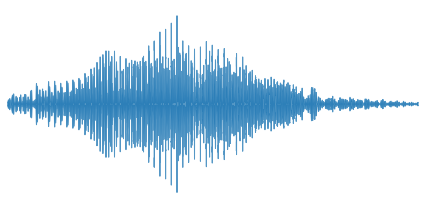

In [6]:
fig = display_waveform(X)
# fig.savefig('raw.svg', transparent=True)

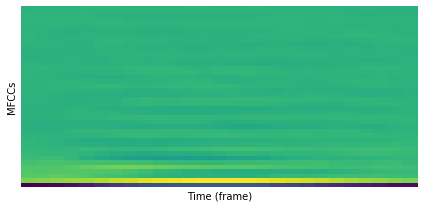

In [7]:
mfccs = librosa.feature.mfcc(X, sr=sr, n_mfcc=n_mfcc+1)
fig, _ = display_mfccs(mfccs)
# fig.savefig('raw-mfccs.svg', transparent=True)

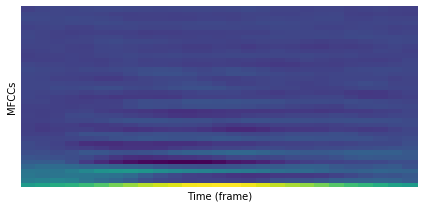

In [8]:
mfccs = mfccs[1:]
fig, _ = display_mfccs(mfccs)
# fig.savefig('trim-mfccs.svg', transparent=True)

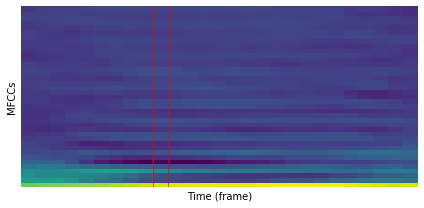

In [9]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=0)
fig, ax = display_mfccs(mfccs, show=False)
plt.axvline(x=9, ymin=0, ymax=1, c='r', linewidth=0.7)
plt.axvline(x=10, ymin=0, ymax=1, c='r', linewidth=0.7)
plt.tight_layout()
# plt.savefig('standardize-trim-mfccs.svg', transparent=True)
plt.show()

In [10]:
fig, _ = display_mfccs(mfccs[:, 0][:, None], figsize=(0.5, 3), labels=False)
# fig.savefig('mfcc-1.svg', transparent=True)

In [11]:
fig, _ = display_mfccs(mfccs[:, 1][:, None], figsize=(0.5, 3), labels=False)
# fig.savefig('mfcc-2.svg', transparent=True)

In [12]:
fig, _ = display_mfccs(mfccs[:, -1][:, None], figsize=(0.5, 3), labels=False)
# fig.savefig('mfcc-T.svg', transparent=True)

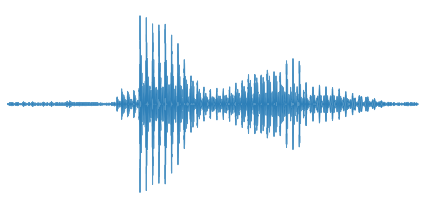

In [13]:
# Find the index of the first spoken digit that was a 7
for i, y in enumerate(yy_train):
    if y == '7':
        break
        
X, y = XX_train[i], yy_train[i]
        
fig = display_waveform(X)
# fig.savefig('fsdd-7.svg', transparent=True)